# Time series analysis with Pandas 

In this session we learn how to use Pandas for time series analysis. The exercise is to read in meteorological data from a table and to calculate anomalies. 

The meteorological data used for the following example are available here
http://icdc.zmaw.de/daten/atmosphere/dwd-station.html

Suggested textbooks for Pandas 

 * http://dx.doi.org/10.1007/978-1-4842-0958-5 Python Data Analytics

 * http://proquest.safaribooksonline.com/9781449323592 Python for data analysis


## Pandas and Pylab

First we import the modules


In [71]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## Read data from table to Pandas DataFrame object

In [315]:
fn='/data/icdc/atmosphere/dwd_stations/DATA/dwdstation_hamburg_fuhlsbuettel_kl_10147.csv'
DF=pd.read_csv(fn,encoding = "ISO-8859-1",usecols=[6,7,8,15,16],parse_dates=[[0,1,2]])
DF.columns=['Date','T','Quality'] # Make column names shorter
DF.head()

,Date,T,Quality
0,1891-01-01,-10.7,0
1,1891-01-02,-7.6,0
2,1891-01-03,-10.3,0
3,1891-01-04,-1.3,0
4,1891-01-05,-4.1,0


## Create Pandas Series objects

In [316]:
dates=pd.to_datetime(DF['Date'].values) # Create a separate DatetimeIndex for selections
T=pd.Series(DF['T'].values,index=dates) # Create a time series with date index
Q=pd.Series(DF['Quality'].values,index=dates) # Quality flag not used in the following

## Display  and indexing of time series

In [158]:
T['2015-12-24':] # Show all entries since 24th december

2015-12-24     8.5
2015-12-25     7.8
2015-12-26    13.0
2015-12-27    10.2
2015-12-28     3.7
2015-12-29     5.4
2015-12-30     4.5
2015-12-31     2.1
2016-01-01     3.5
2016-01-02     0.1
2016-01-03    -6.0
2016-01-04    -7.2
2016-01-05    -5.7
2016-01-06    -5.4
2016-01-07    -4.6
2016-01-08     2.3
2016-01-09     1.3
2016-01-10     1.9
2016-01-11     2.0
2016-01-12     4.3
dtype: float64

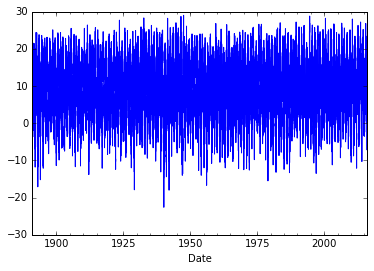

In [116]:
T.plot() 

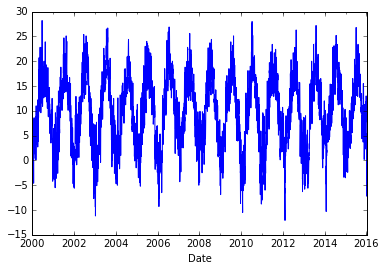

In [124]:
T['2000-01-01':'2016-01-12'].plot()
#Q['2000-01-01':'2016-01-12'].plot()

In [147]:
dates[:3] # Show first three entries

DatetimeIndex(['1891-01-01', '1891-01-02', '1891-01-03'], dtype='datetime64[ns]', freq=None)

In [150]:
dates[-3:] # Show last three entries

DatetimeIndex(['2016-01-10', '2016-01-11', '2016-01-12'], dtype='datetime64[ns]', freq=None)

In [159]:
week_index=dates.to_period(freq='W-MON')
week_index

PeriodIndex(['1890-12-30/1891-01-05', '1890-12-30/1891-01-05',
             '1890-12-30/1891-01-05', '1890-12-30/1891-01-05',
             '1890-12-30/1891-01-05', '1891-01-06/1891-01-12',
             '1891-01-06/1891-01-12', '1891-01-06/1891-01-12',
             '1891-01-06/1891-01-12', '1891-01-06/1891-01-12',
             ...
             '2015-12-29/2016-01-04', '2015-12-29/2016-01-04',
             '2016-01-05/2016-01-11', '2016-01-05/2016-01-11',
             '2016-01-05/2016-01-11', '2016-01-05/2016-01-11',
             '2016-01-05/2016-01-11', '2016-01-05/2016-01-11',
             '2016-01-05/2016-01-11', '2016-01-12/2016-01-18'],
            dtype='int64', length=45667, freq='W-MON')

## Pandas Frequencies

|Code | Offset | Description   |
|-----|--------|---------------|
|D    | Day    | Calendar daily|
|B    | BusinessDay| Business daily|
|H    |Hour    |Hourly |
|T or min| Minute | Minutely |
|S |Second |Secondly |
|L or ms| Milli |Millisecond |
|U |Micro | Microsecond |
|M |MonthEnd |Last calendar day of month|
|BM |BusinessMonthEnd | Last business day (weekday) of month|
|MS |MonthBegin | First calendar day of month|
|BMS|BusinessMonthBegin| First weekday of month|
|W-MON, W-TUE, ...| Week | Weekly on given day of week|
|A-JAN, A-FEB, ...|YearEnd| Annual dates anchored on last calendar day of given month|
|AS-JAN, AS-FEB, ...| YearBegin |Annual dates anchored on first day of given month|


## Creating masks for temporal selections

In [317]:
week_index.weekofyear[0:20] # show example

array([2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5])

In [194]:
mask=week_index.weekofyear==2 # Generate index mask for

In [196]:
T[mask].mean() # Select all entries of the mask

0.7914772727272722

The above example shows how to select week of year number 2 and to use the mask.
## Calculating weekly means

In [233]:
# The following explicit calculation could be replaced with the groupby method
W=52
weekly_mean=zeros(W)
for i in range(1,W+1):
    weekly_mean[i-1]=T[week_index.weekofyear==i].mean()

array([  1.4256    ,   0.79147727,   0.71974886,   0.71634286,
         0.49154286,   0.86491429,   0.804     ,   0.99017143,
         1.50914286,   2.21302857,   3.23462857,   3.65588571,
         4.76594286,   5.72034286,   6.28228571,   7.40731429,
         8.544     ,   9.63142857,  10.52754286,  11.99154286,
        12.5696    ,  13.64194286,  14.73851429,  15.17085714,
        15.2256    ,  15.9568    ,  16.35748571,  17.34845714,
        17.35142857,  17.35394286,  17.78697143,  17.5568    ,
        17.264     ,  16.93257143,  16.26365714,  15.67897143,
        14.97977143,  13.872     ,  13.15131429,  12.0928    ,
        11.1728    ,  10.10742857,   8.86068571,   7.84114286,
         6.9       ,   5.74411429,   4.54137143,   3.92697143,
         3.32708571,   2.71965714,   2.11337143,   1.56857143])

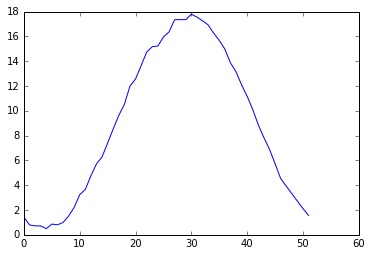

In [232]:
plot(weekly_mean)
weekly_mean

## Fitting of analytical functions

In the following we use the scipy.optimze module to fit an analytical function to the seasonal cycle. 

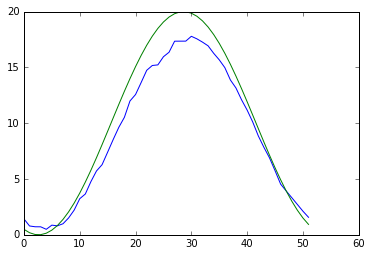

In [286]:
# Representation of the seasonal cycle with a simple sine function
def my_seasonal(x, freq, amplitude, phase, offset):
    return sin(x * freq + phase) * amplitude + offset

x=arange(52)
plot(weekly_mean)
first_guess=my_seasonal(x,2*pi/52,10,-0.6*pi,10) # first guess
plot(first_guess)

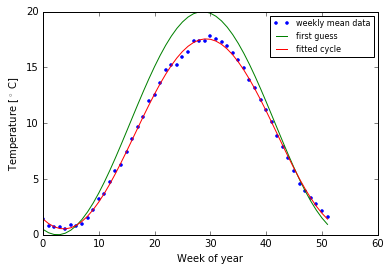

In [318]:
from scipy.optimize import curve_fit

p0=[2*pi/52,10,-0.6*pi,10] # First guess parameter

# now do the fit
fit = curve_fit(my_seasonal, x, weekly_mean, p0=p0)

# recreate the fitted curve using the optimized parameters
seasonal_fit = my_seasonal(x, *fit[0])

plot(weekly_mean, '.',label='weekly mean data')
plot(first_guess, label='first guess')
plot(seasonal_fit, label='fitted cycle')
legend(fontsize=8)
xlabel('Week of year')
ylabel('Temperature [$^\circ$ C]')

## Calculate and plot the results

In the following we use different Pandas methods to calculate rolling mean values and to resample the data. Look up the Pandas documentation and books for more details.

### Climatology

Here we represent the climatological seasonal cycle through the analytical fit

In [321]:
T_climfit=my_seasonal(T.index.weekofyear,*fit[0])
T_climfit_dates=T.index
T_climfit_series=pd.Series(T_clim,index=T_clim_dates)

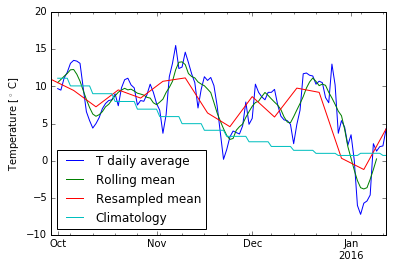

In [322]:
T['2015-10-01':].plot(label='T daily average')
T_rolling_mean=pd.rolling_mean(T,window=7,center=True)
T_rolling_mean['2015-10-01':].plot(label='Rolling mean')

T_weekly_resampled=T.resample('W-MON',how='mean')
T_weekly_resampled['2015-10-01':].plot(label='Resampled mean')

T_climfit_series['2015-10-01':].plot(label='Climatology')              

legend(loc=3)
ylabel('Temperature [$^\circ$ C]')

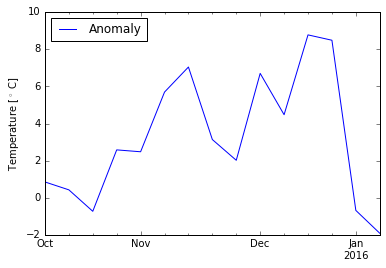

In [312]:
T_anom=(T_weekly_resampled-T_climfit_series).dropna()
T_anom['2015-10-01':].plot(label='Anomaly')              
legend(loc=2)
ylabel('Temperature [$^\circ$ C]')

# Exercise

 * Look up the documentation for the resample and rolling mean methods. 
 * Investigate the variables and explain the dropna method.
